Loaading Dependancies

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

Data Exploration

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#number of missing values
column_names = df.columns 
for column in column_names:
    print(column + ' - ' + str(df[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [6]:
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
df.dropna(subset=['Embarked'], inplace=True)
df.shape

(889, 8)

In [9]:
fig = px.sunburst(df, path=['Embarked','Sex']).update_traces(textinfo='label+percent parent')
fig.show()

Encode Embarked

In [10]:
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 62.5+ KB


Encode Sex

In [12]:
fig = px.sunburst(df, path=['Survived','Sex']).update_traces(textinfo='label+percent parent')
fig.show()

In [13]:
df['Sex']=le.fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [14]:
cols=df.columns
cols

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Handling Missing Values

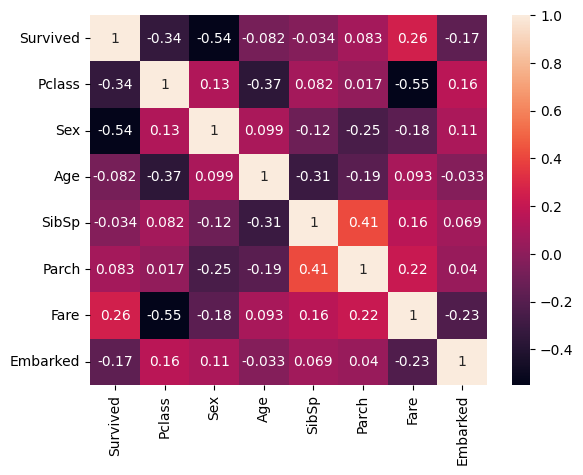

In [15]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
knn=KNNImputer(n_neighbors=5)
df=knn.fit_transform(df)
df=pd.DataFrame(df,columns=cols)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...
884,0.0,2.0,1.0,27.0,0.0,0.0,13.0000,2.0
885,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,2.0
886,0.0,3.0,0.0,26.8,1.0,2.0,23.4500,2.0
887,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    float64
 1   Pclass    889 non-null    float64
 2   Sex       889 non-null    float64
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    float64
 5   Parch     889 non-null    float64
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(8)
memory usage: 55.7 KB


Data Visualization

Survived
0.0    549
1.0    340
Name: count, dtype: int64


Text(0, 0.5, 'Passenger Count')

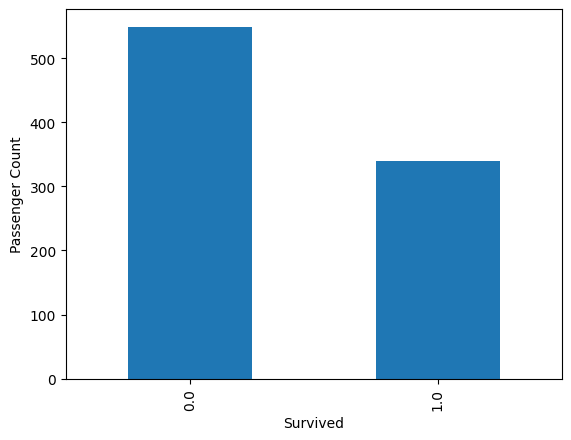

In [18]:
#Visualization of (Target column)
print(df['Survived'].value_counts())
plt = df['Survived'].value_counts().plot(kind='bar')
plt.set_xlabel('Survived')
plt.set_ylabel('Passenger Count')

Pclass
1.0    214
2.0    184
3.0    491
Name: count, dtype: int64


Text(0, 0.5, 'Num of Passengers')

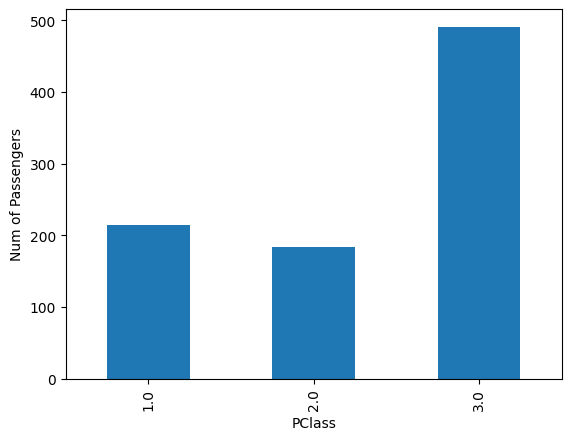

In [19]:
#Visualization of Class
print(df['Pclass'].value_counts().sort_index())
plt = df['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('PClass')
plt.set_ylabel('Num of Passengers')

In [20]:
#survived Passengers from each Class
df[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1.0,134.0
2.0,87.0
3.0,119.0


Text(0, 0.5, 'Survive Percentage')

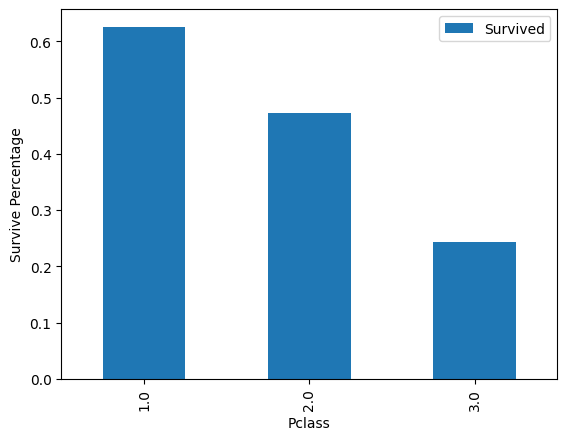

In [21]:
#Visualization of Pclass - Survival probability
plt = df[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survive Percentage')

In [22]:
fig = px.histogram(df,x='Age',color='Survived')
fig.show()

In [23]:
f_c= list(df.select_dtypes('float64').columns)

fig = px.box(df, y=f_c)
fig.show()

Handleing outlier

In [24]:
df=df[df['Fare']<300]
df.shape

(886, 8)

**Data Modeling**

In [25]:
x=df.drop('Survived',axis=1)
y=df['Survived']

Handling Data Unbalance

In [26]:
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x,y)

In [27]:
x_res.shape,y_res.shape

((1098, 7), (1098,))

Splitting data

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

Check overfitting and Evaluate model

In [29]:
def check_overfitting(model,x_train,x_val,x_test):
    y_train_pred=model.predict(x_train)
    y_val_pred=model.predict(x_val)
    y_test_pred=model.predict(x_test)

    Train_accuracy = accuracy_score(y_train,y_train_pred)
    Validaion_accuracy = accuracy_score(y_val,y_val_pred)
    Test_accuracy = accuracy_score(y_test,y_test_pred)

    print(f"-Train accuracy: {Train_accuracy*100:.2f}%")
    print(f"-Validation accuracy: {Validaion_accuracy*100:.2f}%")
    print(f"-Test accuracy: {Test_accuracy*100:.2f}%")


    print(f'-F1_Score: {f1_score(y_test,y_test_pred)*100:.2f}%')
    print(f'-Precision: {precision_score(y_test,y_test_pred)*100:.2f}%')
    print(f'-Recall: {recall_score(y_test,y_test_pred)*100:.2f}%\n\n')

    sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='d')
    
    if abs(Validaion_accuracy - Train_accuracy)*100 > 5:
        print(f"-Overfitting with diff: {abs(Validaion_accuracy - Train_accuracy)*100:.2f}%\n")
        print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    else:
        print(f"-Not Overfitting & Test accuracy: {Test_accuracy*100:.2f}%\n\n")

In [30]:
random_forest=RandomForestClassifier(random_state=42)
params={'n_estimators':[10,50,100,150,200],'max_depth':[1,2,3,4,5,6,7,8,9,10],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
grid=GridSearchCV(estimator=random_forest,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')
grid.fit(x_train,y_train)

c:\Users\bedir\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='accuracy')

In [31]:
finall_random_forest=grid.best_estimator_
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

-Train accuracy: 95.58%
-Validation accuracy: 85.23%
-Test accuracy: 84.09%
-F1_Score: 82.59%
-Precision: 87.37%
-Recall: 78.30%


-Overfitting with diff: 10.36%

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx



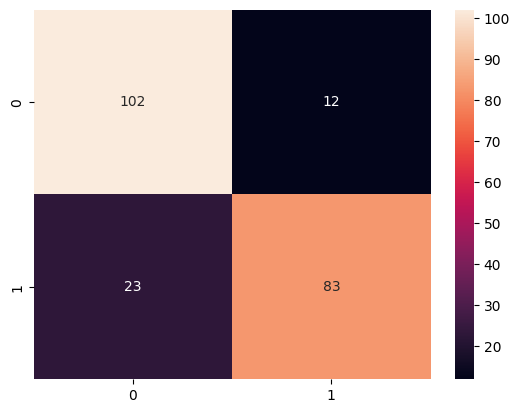

In [32]:
check_overfitting(finall_random_forest,x_train,x_val,x_test)